In [29]:
import os
path = os.getcwd()
path

'C:\\Users\\14692\\RatDataSimulation'

In [2]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  16


In [2]:
!nvidia-smi;

import numpy as np
import os
import numpy.random as random
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models


from tensorflow.keras.layers import Dense, Input, Flatten, Reshape
from tensorflow.keras.layers import GaussianNoise, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
K = tensorflow.keras.backend
from umap import UMAP

import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%load_ext autoreload
%autoreload 2
import matplotlib 
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
import os 

import h5py 
import matplotlib.pyplot as plt
import numpy as np
import glob
from scipy.ndimage import median_filter
import time
%matplotlib notebook
import pandas as pd
from numpy import save

from moviepy.editor import VideoClip 
from moviepy.video.io.bindings import mplfig_to_npimage

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [218]:
variational_ae = tf.keras.models.load_model('saved_model/four_layer_8')

In [4]:
variational_ae.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 57)]         0                                            
__________________________________________________________________________________________________
model_6 (Functional)            [(None, 10), (None,  7195        input_5[0][0]                    
__________________________________________________________________________________________________
model_7 (Functional)            (None, 57)           6932        model_6[0][2]                    
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 50)           2900        input_5[0][0]                    
                                                                 input_5[0][0]              

In [220]:
eh5 = np.load('diego_mocap_files_rat_JDM31_day_13_interpolate_centered.npy')

In [221]:
VAEOUTPUT = variational_ae.predict(eh5)

In [222]:
save('VAEOUTPUT.npy', VAEOUTPUT)

In [250]:
intermediate_model=tf.keras.models.Model(inputs=variational_ae.input,outputs=variational_ae.get_layer('dense_22').output)

In [251]:
log_var = intermediate_model.predict(eh5)

In [252]:
intermediate_mean_model=tf.keras.models.Model(inputs=variational_ae.input,outputs=variational_ae.get_layer('dense_21').output)

In [253]:
mean = intermediate_mean_model.predict(eh5)

In [254]:
class Sampling(layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

#variational_ae = tf.keras.models.load_model('saved_model/four_layer_8')
print("Generate predictions for Interpolate centered data")
#predicted_eh5 = variational_ae.predict(eh5)
VAESAMPLING = K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

Generate predictions for Interpolate centered data


In [14]:
VAESAMPLING

<tf.Tensor: shape=(19980000, 10), dtype=float32, numpy=
array([[ 5.6121788e+00, -4.6692367e+00, -7.2204604e+00, ...,
        -2.6545525e-03, -2.4989510e+00, -2.4513524e+00],
       [ 5.6162825e+00, -4.7259264e+00, -7.2564206e+00, ...,
         6.8107113e-02, -2.4923196e+00, -2.4485891e+00],
       [ 5.6156492e+00, -4.7450061e+00, -7.2295332e+00, ...,
        -1.4470488e-02, -2.4925635e+00, -2.4375892e+00],
       ...,
       [ 3.4418273e-01,  6.1154974e-01,  8.9263815e-01, ...,
        -5.8525640e-01, -1.0812948e+00,  6.4025146e-01],
       [ 3.4693322e-01,  5.2479613e-01,  7.5542164e-01, ...,
        -5.7432985e-01, -1.0899042e+00,  5.2531970e-01],
       [ 3.3992249e-01,  4.5353884e-01,  8.9654952e-01, ...,
        -5.7915151e-01, -1.0752478e+00,  6.1248106e-01]], dtype=float32)>

In [255]:
save('VAESAMPLING.npy', VAESAMPLING)

In [15]:
import glob, os, pickle
from datetime import datetime

import numpy as np
from scipy.io import loadmat,savemat
import hdf5storage

import motionmapperpy as mmpy

In [17]:
for i in range(100):
    projs = np.array_split(np.array(VAESAMPLING),100)[i]
    #print(projs.shape)
    savemat('C:\\Users\\14692\\RatDataSimulation\\VAESAMPLING_TSNE/Projections/dataset_%i_pcaModes.mat'%(i+1), {'projections':projs})

In [16]:
parameters = mmpy.setRunParameters()

In [17]:
parameters.minF = 1 #% Minimum frequency for Morlet Wavelet Transform

parameters.maxF = 150                    #% Maximum frequency for Morlet Wavelet Transform,
                                        #% equal to Nyquist frequency for your measurements.

parameters.samplingFreq = 300            #% Sampling frequency (or FPS) of data.

parameters.numPeriods = 25              #% No. of frequencies between minF and maxF.

parameters.numProcessors = 16           #% No. of processor to use when parallel
                                        #% processing (for wavelets, if not using GPU). -1 to use all cores.

parameters.useGPU = -1                   # GPU to use, set to -1 if GPU not present

parameters.training_numPoints=5000      #% Number of points in mini-tSNEs.

# %%%%% NO NEED TO CHANGE THESE UNLESS RAM (NOT GPU) MEMORY ERRORS RAISED%%%%%%%%%%
parameters.trainingSetSize=50000        #% Total number of representative points to find. Increase or decrease based on
                                        #% available RAM. For reference, 36k is a good number with 64GB RAM.

parameters.embedding_batchSize = 30000  #% Lower this if you get a memory error when re-embedding points on learned
                                        #% tSNE map.

In [18]:
taskFolder = 'C:\\Users\\14692\\RatDataSimulation\\VAESAMPLING_TSNE'

In [12]:
projectionFiles = glob.glob(taskFolder+'/Projections/*pcaModes.mat')
for i in projectionFiles:
    print(i)

m = loadmat(projectionFiles[0], variable_names=['projections'])['projections']

# %%%%%
parameters.pcaModes = m.shape[1] #%Number of PCA projections in saved files.
parameters.numProjections = parameters.pcaModes
# %%%%%
del m

print(datetime.now().strftime('%m-%d-%Y_%H-%M'))
print('tsneStarted')

if not os.path.exists(taskFolder+'/TSNE/training_tsne_embedding.mat'):
    print('Running minitSNE')
    mmpy.subsampled_tsne_from_projections(parameters, taskFolder)
    print('minitSNE done, finding embeddings now.')
    print(datetime.now().strftime('%m-%d-%Y_%H-%M'))

import h5py
with h5py.File(taskFolder+'/TSNE/training_data.mat', 'r') as hfile:
    trainingSetData = hfile['trainingSetData'][:].T
with h5py.File(taskFolder+'/TSNE/training_tsne_embedding.mat', 'r') as hfile:
    trainingEmbedding= hfile['trainingEmbedding'][:].T


for i in range(len(projectionFiles)):
    print('Finding Embeddings')
    print('%i/%i : %s'%(i+1,len(projectionFiles), projectionFiles[i]))
    if os.path.exists(projectionFiles[i][:-4] +'_zVals.mat'): #Way to skip already done code
        print('Already done. Skipping.\n')
        continue


    projections = loadmat(projectionFiles[i])['projections']
    zValues, outputStatistics = mmpy.findEmbeddings(projections,trainingSetData,trainingEmbedding,parameters)

    hdf5storage.write(data = {'zValues':zValues}, path = '/', truncate_existing = True,
                    filename = projectionFiles[i][:-4]+'_zVals.mat', store_python_metadata = False,
                      matlab_compatible = True)
    with open(projectionFiles[i][:-4] + '_zVals_outputStatistics.pkl', 'wb') as hfile:
        pickle.dump(outputStatistics, hfile)

    print('Embeddings saved.\n')
    del zValues,projections,outputStatistics

print('All Embeddings Saved!')

mmpy.findWatershedRegions(taskFolder, parameters, minimum_regions=150, startsigma=0.3, pThreshold=[0.33, 0.67],
                     saveplot=True, endident = '*_pcaModes.mat')

C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_100_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_10_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_11_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_12_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_13_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_14_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_15_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_16_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_17_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_18_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_19_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Pro

	 Done at 8.13 seconds.
	 Calculating Distances
	 Running t-SNE
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.036s...
[t-SNE] Computed neighbors for 5000 samples in 0.182s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.119723
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.491684
[t-SNE] KL divergence after 1000 iterations: 1.891049
Finding Templates.
Finding training set contributions from data set 2/100 : 
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_10_pcaModes.mat
	 Loading Projections
	 Calculating Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 8.56 seconds.
	 Calculating 

[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.894943
[t-SNE] KL divergence after 1000 iterations: 2.058917
Finding Templates.
Finding training set contributions from data set 10/100 : 
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_18_pcaModes.mat
	 Loading Projections
	 Calculating Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 8.14 seconds.
	 Calculating Distances
	 Running t-SNE
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.038s...
[t-SNE] Computed neighbors for 5000 samples in 0.249s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.096962
[t-SNE] KL divergence after 250 itera

[t-SNE] Computed neighbors for 5000 samples in 0.199s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.114811
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.590698
[t-SNE] KL divergence after 1000 iterations: 2.019581
Finding Templates.
Finding training set contributions from data set 19/100 : 
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_26_pcaModes.mat
	 Loading Projections
	 Calculating Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 8.29 seconds.
	 Calculating Distances
	 Running t-SNE
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.037s...
[t-SNE] Computed neighbors for 5000 s

[t-SNE] KL divergence after 1000 iterations: 3.382566
Finding Templates.
Finding training set contributions from data set 27/100 : 
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_33_pcaModes.mat
	 Loading Projections
	 Calculating Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 8.35 seconds.
	 Calculating Distances
	 Running t-SNE
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.041s...
[t-SNE] Computed neighbors for 5000 samples in 0.193s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.115802
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.285194
[t-SNE] KL divergence after 1000 iter

[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.611305
[t-SNE] KL divergence after 1000 iterations: 1.703173
Finding Templates.
Finding training set contributions from data set 36/100 : 
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_41_pcaModes.mat
	 Loading Projections
	 Calculating Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 7.88 seconds.
	 Calculating Distances
	 Running t-SNE
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.094s...
[t-SNE] Computed neighbors for 5000 samples in 0.214s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.141087
[t-SNE] KL divergence after 250 itera

[t-SNE] Computed neighbors for 5000 samples in 0.224s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.086374
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.039261
[t-SNE] KL divergence after 1000 iterations: 3.509629
Finding Templates.
Finding training set contributions from data set 45/100 : 
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_4_pcaModes.mat
	 Loading Projections
	 Calculating Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 7.95 seconds.
	 Calculating Distances
	 Running t-SNE
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.033s...
[t-SNE] Computed neighbors for 5000 sa

[t-SNE] KL divergence after 1000 iterations: 3.504897
Finding Templates.
Finding training set contributions from data set 53/100 : 
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_57_pcaModes.mat
	 Loading Projections
	 Calculating Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 8.28 seconds.
	 Calculating Distances
	 Running t-SNE
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.036s...
[t-SNE] Computed neighbors for 5000 samples in 0.184s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.117081
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.235497
[t-SNE] KL divergence after 1000 iter

[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.372673
[t-SNE] KL divergence after 1000 iterations: 3.538930
Finding Templates.
Finding training set contributions from data set 62/100 : 
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_65_pcaModes.mat
	 Loading Projections
	 Calculating Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 7.85 seconds.
	 Calculating Distances
	 Running t-SNE
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.034s...
[t-SNE] Computed neighbors for 5000 samples in 0.213s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.090037
[t-SNE] KL divergence after 250 itera

[t-SNE] Computed neighbors for 5000 samples in 0.192s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.102614
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.857712
[t-SNE] KL divergence after 1000 iterations: 2.658230
Finding Templates.
Finding training set contributions from data set 71/100 : 
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_73_pcaModes.mat
	 Loading Projections
	 Calculating Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 7.78 seconds.
	 Calculating Distances
	 Running t-SNE
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.039s...
[t-SNE] Computed neighbors for 5000 s

[t-SNE] KL divergence after 1000 iterations: 2.953473
Finding Templates.
Finding training set contributions from data set 79/100 : 
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_80_pcaModes.mat
	 Loading Projections
	 Calculating Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 7.74 seconds.
	 Calculating Distances
	 Running t-SNE
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.036s...
[t-SNE] Computed neighbors for 5000 samples in 0.189s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.104807
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.822868
[t-SNE] KL divergence after 1000 iter

[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.012482
[t-SNE] KL divergence after 1000 iterations: 1.894956
Finding Templates.
Finding training set contributions from data set 88/100 : 
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_89_pcaModes.mat
	 Loading Projections
	 Calculating Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 7.66 seconds.
	 Calculating Distances
	 Running t-SNE
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.031s...
[t-SNE] Computed neighbors for 5000 samples in 0.224s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.167864
[t-SNE] KL divergence after 250 itera

[t-SNE] Computed neighbors for 5000 samples in 0.212s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.099509
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.758072
[t-SNE] KL divergence after 1000 iterations: 2.562247
Finding Templates.
Finding training set contributions from data set 97/100 : 
C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_97_pcaModes.mat
	 Loading Projections
	 Calculating Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 7.75 seconds.
	 Calculating Distances
	 Running t-SNE
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.040s...
[t-SNE] Computed neighbors for 5000 s

	 Done at 7.79 seconds.
Finding Embeddings
	 Processing batch #   1 out of    7
	 Calculating distances for batch    1
	 Calculated distances for batch    1 13.65seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 44.91seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 14.79seconds.
	 Calculating fminProjections for batch    2
	 Processed batch #   2 out of    7 in 44.51seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 14.65seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 45.94seconds.

	 Processing batch #   4 out of    7
	 Calculating distances for batch    4
	 Calculated distances for batch    4 14.68seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 44.97seconds.

	 Processing batch #   5 out of    7
	 Calculatin

	 Calculated distances for batch    4 15.24seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 46.12seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 15.00seconds.
	 Calculating fminProjections for batch    5
	 Processed batch #   5 out of    7 in 46.39seconds.

	 Processing batch #   6 out of    7
	 Calculating distances for batch    6
	 Calculated distances for batch    6 15.01seconds.
	 Calculating fminProjections for batch    6
	 Processed batch #   6 out of    7 in 48.71seconds.

	 Processing batch #   7 out of    7
	 Calculating distances for batch    7
	 Calculated distances for batch    7 10.18seconds.
	 Calculating fminProjections for batch    7
	 Processed batch #   7 out of    7 in 31.55seconds.

Embeddings found in 410.48 seconds.
Embeddings saved.

Finding Embeddings
6/100 : C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_14_pcaModes.mat


	 Processed batch #   7 out of    7 in 30.56seconds.

Embeddings found in 409.87 seconds.
Embeddings saved.

Finding Embeddings
10/100 : C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_18_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 7.83 seconds.
Finding Embeddings
	 Processing batch #   1 out of    7
	 Calculating distances for batch    1
	 Calculated distances for batch    1 14.89seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 45.45seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 15.69seconds.
	 Calculating fminProjections for batch    2
	 Processed batch #   2 out of    7 in 47.05seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 15.20seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of  

	 Processed batch #   2 out of    7 in 45.49seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 15.61seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 44.50seconds.

	 Processing batch #   4 out of    7
	 Calculating distances for batch    4
	 Calculated distances for batch    4 15.61seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 44.84seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 15.62seconds.
	 Calculating fminProjections for batch    5
	 Processed batch #   5 out of    7 in 45.82seconds.

	 Processing batch #   6 out of    7
	 Calculating distances for batch    6
	 Calculated distances for batch    6 15.60seconds.
	 Calculating fminProjections for batch    6
	 Processed batch #   6 out of    7 in 44.82seconds.

	 Processing batch #   7 out of    7
	

	 Calculated distances for batch    6 15.66seconds.
	 Calculating fminProjections for batch    6
	 Processed batch #   6 out of    7 in 45.28seconds.

	 Processing batch #   7 out of    7
	 Calculating distances for batch    7
	 Calculated distances for batch    7 10.58seconds.
	 Calculating fminProjections for batch    7
	 Processed batch #   7 out of    7 in 30.32seconds.

Embeddings found in 409.28 seconds.
Embeddings saved.

Finding Embeddings
19/100 : C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_26_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 7.90 seconds.
Finding Embeddings
	 Processing batch #   1 out of    7
	 Calculating distances for batch    1
	 Calculated distances for batch    1 14.77seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 45.07seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch

	 Calculated distances for batch    1 14.69seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 45.83seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 15.71seconds.
	 Calculating fminProjections for batch    2
	 Processed batch #   2 out of    7 in 45.71seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 15.71seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 45.53seconds.

	 Processing batch #   4 out of    7
	 Calculating distances for batch    4
	 Calculated distances for batch    4 15.65seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 45.90seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 15.71seconds.
	 Calculating fminProjections for batch 

	 Processed batch #   4 out of    7 in 46.33seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 15.68seconds.
	 Calculating fminProjections for batch    5
	 Processed batch #   5 out of    7 in 46.33seconds.

	 Processing batch #   6 out of    7
	 Calculating distances for batch    6
	 Calculated distances for batch    6 15.82seconds.
	 Calculating fminProjections for batch    6
	 Processed batch #   6 out of    7 in 46.32seconds.

	 Processing batch #   7 out of    7
	 Calculating distances for batch    7
	 Calculated distances for batch    7 10.66seconds.
	 Calculating fminProjections for batch    7
	 Processed batch #   7 out of    7 in 30.24seconds.

Embeddings found in 428.25 seconds.
Embeddings saved.

Finding Embeddings
28/100 : C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_34_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 8.14 second

Embeddings found in 406.71 seconds.
Embeddings saved.

Finding Embeddings
32/100 : C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_38_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 7.91 seconds.
Finding Embeddings
	 Processing batch #   1 out of    7
	 Calculating distances for batch    1
	 Calculated distances for batch    1 14.70seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 44.75seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 15.69seconds.
	 Calculating fminProjections for batch    2
	 Processed batch #   2 out of    7 in 45.40seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 15.66seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 46.31seconds.

	 Processing batch #   4 out of 

	 Calculated distances for batch    3 15.59seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 44.92seconds.

	 Processing batch #   4 out of    7
	 Calculating distances for batch    4
	 Calculated distances for batch    4 15.67seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 44.91seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 15.57seconds.
	 Calculating fminProjections for batch    5
	 Processed batch #   5 out of    7 in 45.06seconds.

	 Processing batch #   6 out of    7
	 Calculating distances for batch    6
	 Calculated distances for batch    6 15.57seconds.
	 Calculating fminProjections for batch    6
	 Processed batch #   6 out of    7 in 45.33seconds.

	 Processing batch #   7 out of    7
	 Calculating distances for batch    7
	 Calculated distances for batch    7 10.53seconds.
	 Calculating fminProjections for batch 

	 Processed batch #   6 out of    7 in 46.11seconds.

	 Processing batch #   7 out of    7
	 Calculating distances for batch    7
	 Calculated distances for batch    7 10.51seconds.
	 Calculating fminProjections for batch    7
	 Processed batch #   7 out of    7 in 30.78seconds.

Embeddings found in 409.91 seconds.
Embeddings saved.

Finding Embeddings
41/100 : C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_46_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 7.87 seconds.
Finding Embeddings
	 Processing batch #   1 out of    7
	 Calculating distances for batch    1
	 Calculated distances for batch    1 14.61seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 45.30seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 15.62seconds.
	 Calculating fminProjections for batch    2
	 Processed batch #   2 out of  

	 Processed batch #   1 out of    7 in 45.74seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 15.78seconds.
	 Calculating fminProjections for batch    2
	 Processed batch #   2 out of    7 in 46.63seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 16.08seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 47.32seconds.

	 Processing batch #   4 out of    7
	 Calculating distances for batch    4
	 Calculated distances for batch    4 15.97seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 46.71seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 16.00seconds.
	 Calculating fminProjections for batch    5
	 Processed batch #   5 out of    7 in 46.94seconds.

	 Processing batch #   6 out of    7
	

	 Calculated distances for batch    5 16.37seconds.
	 Calculating fminProjections for batch    5
	 Processed batch #   5 out of    7 in 48.04seconds.

	 Processing batch #   6 out of    7
	 Calculating distances for batch    6
	 Calculated distances for batch    6 16.25seconds.
	 Calculating fminProjections for batch    6
	 Processed batch #   6 out of    7 in 50.14seconds.

	 Processing batch #   7 out of    7
	 Calculating distances for batch    7
	 Calculated distances for batch    7 10.90seconds.
	 Calculating fminProjections for batch    7
	 Processed batch #   7 out of    7 in 31.14seconds.

Embeddings found in 425.62 seconds.
Embeddings saved.

Finding Embeddings
50/100 : C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_54_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 8.40 seconds.
Finding Embeddings
	 Processing batch #   1 out of    7
	 Calculating distances for batch    1
	 Calculated distances for batch

	 Done at 7.87 seconds.
Finding Embeddings
	 Processing batch #   1 out of    7
	 Calculating distances for batch    1
	 Calculated distances for batch    1 14.66seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 45.41seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 15.57seconds.
	 Calculating fminProjections for batch    2
	 Processed batch #   2 out of    7 in 45.02seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 15.51seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 45.86seconds.

	 Processing batch #   4 out of    7
	 Calculating distances for batch    4
	 Calculated distances for batch    4 15.77seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 45.02seconds.

	 Processing batch #   5 out of    7
	 Calculatin

	 Calculated distances for batch    4 15.52seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 45.60seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 15.56seconds.
	 Calculating fminProjections for batch    5
	 Processed batch #   5 out of    7 in 44.91seconds.

	 Processing batch #   6 out of    7
	 Calculating distances for batch    6
	 Calculated distances for batch    6 15.55seconds.
	 Calculating fminProjections for batch    6
	 Processed batch #   6 out of    7 in 45.22seconds.

	 Processing batch #   7 out of    7
	 Calculating distances for batch    7
	 Calculated distances for batch    7 10.51seconds.
	 Calculating fminProjections for batch    7
	 Processed batch #   7 out of    7 in 29.79seconds.

Embeddings found in 405.27 seconds.
Embeddings saved.

Finding Embeddings
59/100 : C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_62_pcaModes.mat

	 Processed batch #   7 out of    7 in 30.24seconds.

Embeddings found in 407.68 seconds.
Embeddings saved.

Finding Embeddings
63/100 : C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_66_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 7.84 seconds.
Finding Embeddings
	 Processing batch #   1 out of    7
	 Calculating distances for batch    1
	 Calculated distances for batch    1 14.54seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 45.34seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 15.43seconds.
	 Calculating fminProjections for batch    2
	 Processed batch #   2 out of    7 in 45.46seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 15.42seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of  

	 Processed batch #   2 out of    7 in 46.06seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 15.53seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 45.46seconds.

	 Processing batch #   4 out of    7
	 Calculating distances for batch    4
	 Calculated distances for batch    4 15.51seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 45.15seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 15.45seconds.
	 Calculating fminProjections for batch    5
	 Processed batch #   5 out of    7 in 46.32seconds.

	 Processing batch #   6 out of    7
	 Calculating distances for batch    6
	 Calculated distances for batch    6 15.53seconds.
	 Calculating fminProjections for batch    6
	 Processed batch #   6 out of    7 in 45.25seconds.

	 Processing batch #   7 out of    7
	

	 Calculated distances for batch    6 15.43seconds.
	 Calculating fminProjections for batch    6
	 Processed batch #   6 out of    7 in 45.81seconds.

	 Processing batch #   7 out of    7
	 Calculating distances for batch    7
	 Calculated distances for batch    7 10.42seconds.
	 Calculating fminProjections for batch    7
	 Processed batch #   7 out of    7 in 31.19seconds.

Embeddings found in 408.04 seconds.
Embeddings saved.

Finding Embeddings
72/100 : C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_74_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 7.78 seconds.
Finding Embeddings
	 Processing batch #   1 out of    7
	 Calculating distances for batch    1
	 Calculated distances for batch    1 14.59seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 46.45seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch

	 Calculated distances for batch    1 14.62seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 44.97seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 15.57seconds.
	 Calculating fminProjections for batch    2
	 Processed batch #   2 out of    7 in 44.50seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 15.59seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 45.21seconds.

	 Processing batch #   4 out of    7
	 Calculating distances for batch    4
	 Calculated distances for batch    4 15.60seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 44.55seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 15.59seconds.
	 Calculating fminProjections for batch 

	 Processed batch #   4 out of    7 in 45.27seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 15.25seconds.
	 Calculating fminProjections for batch    5
	 Processed batch #   5 out of    7 in 45.13seconds.

	 Processing batch #   6 out of    7
	 Calculating distances for batch    6
	 Calculated distances for batch    6 15.14seconds.
	 Calculating fminProjections for batch    6
	 Processed batch #   6 out of    7 in 44.69seconds.

	 Processing batch #   7 out of    7
	 Calculating distances for batch    7
	 Calculated distances for batch    7 10.27seconds.
	 Calculating fminProjections for batch    7
	 Processed batch #   7 out of    7 in 29.69seconds.

Embeddings found in 403.71 seconds.
Embeddings saved.

Finding Embeddings
81/100 : C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_82_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 7.90 second

Embeddings found in 406.04 seconds.
Embeddings saved.

Finding Embeddings
85/100 : C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_86_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 8.03 seconds.
Finding Embeddings
	 Processing batch #   1 out of    7
	 Calculating distances for batch    1
	 Calculated distances for batch    1 14.46seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 45.51seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 15.38seconds.
	 Calculating fminProjections for batch    2
	 Processed batch #   2 out of    7 in 45.02seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 15.41seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 45.37seconds.

	 Processing batch #   4 out of 

	 Calculated distances for batch    3 15.43seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 45.79seconds.

	 Processing batch #   4 out of    7
	 Calculating distances for batch    4
	 Calculated distances for batch    4 15.41seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 45.62seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 15.35seconds.
	 Calculating fminProjections for batch    5
	 Processed batch #   5 out of    7 in 43.31seconds.

	 Processing batch #   6 out of    7
	 Calculating distances for batch    6
	 Calculated distances for batch    6 15.39seconds.
	 Calculating fminProjections for batch    6
	 Processed batch #   6 out of    7 in 44.30seconds.

	 Processing batch #   7 out of    7
	 Calculating distances for batch    7
	 Calculated distances for batch    7 10.42seconds.
	 Calculating fminProjections for batch 

	 Processed batch #   6 out of    7 in 45.57seconds.

	 Processing batch #   7 out of    7
	 Calculating distances for batch    7
	 Calculated distances for batch    7 10.43seconds.
	 Calculating fminProjections for batch    7
	 Processed batch #   7 out of    7 in 30.36seconds.

Embeddings found in 407.62 seconds.
Embeddings saved.

Finding Embeddings
94/100 : C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE/Projections\dataset_94_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 8.10 seconds.
Finding Embeddings
	 Processing batch #   1 out of    7
	 Calculating distances for batch    1
	 Calculated distances for batch    1 14.57seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 45.77seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 15.44seconds.
	 Calculating fminProjections for batch    2
	 Processed batch #   2 out of  

	 Processed batch #   1 out of    7 in 46.01seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 15.50seconds.
	 Calculating fminProjections for batch    2
	 Processed batch #   2 out of    7 in 46.70seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 15.51seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 44.65seconds.

	 Processing batch #   4 out of    7
	 Calculating distances for batch    4
	 Calculated distances for batch    4 15.82seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 45.09seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 15.42seconds.
	 Calculating fminProjections for batch    5
	 Processed batch #   5 out of    7 in 44.76seconds.

	 Processing batch #   6 out of    7
	

56/100 Loading embedding for dataset_5_pcaModes 1.00 seconds.
57/100 Loading embedding for dataset_60_pcaModes 1.01 seconds.
58/100 Loading embedding for dataset_61_pcaModes 1.03 seconds.
59/100 Loading embedding for dataset_62_pcaModes 1.04 seconds.
60/100 Loading embedding for dataset_63_pcaModes 1.05 seconds.
61/100 Loading embedding for dataset_64_pcaModes 1.07 seconds.
62/100 Loading embedding for dataset_65_pcaModes 1.08 seconds.
63/100 Loading embedding for dataset_66_pcaModes 1.10 seconds.
64/100 Loading embedding for dataset_67_pcaModes 1.11 seconds.
65/100 Loading embedding for dataset_68_pcaModes 1.13 seconds.
66/100 Loading embedding for dataset_69_pcaModes 1.15 seconds.
67/100 Loading embedding for dataset_6_pcaModes 1.17 seconds.
68/100 Loading embedding for dataset_70_pcaModes 1.18 seconds.
69/100 Loading embedding for dataset_71_pcaModes 1.19 seconds.
70/100 Loading embedding for dataset_72_pcaModes 1.21 seconds.
71/100 Loading embedding for dataset_73_pcaModes 1.23 sec

# VAE OUTPUT TSNE

In [3]:
VAEOUTPUT = np.load('VAEOUTPUT.npy')

In [4]:
pca = PCA()
PCA_VAEOUTPUT = pca.fit_transform(VAEOUTPUT)
explained_variance = pca.explained_variance_ratio_

In [242]:
np.cumsum(explained_variance)

array([0.33840375, 0.57718823, 0.73070699, 0.82074539, 0.86936255,
       0.90220381, 0.92654422, 0.94230265, 0.95673222, 0.96647821,
       0.97431463, 0.97847382, 0.98210682, 0.98513022, 0.98774905,
       0.98993092, 0.99185164, 0.99330822, 0.99471828, 0.99591678,
       0.99692032, 0.99755487, 0.99812165, 0.99852635, 0.99884101,
       0.9991114 , 0.99933044, 0.99948705, 0.9996035 , 0.99969892,
       0.99978092, 0.99985433, 0.99990696, 0.99993381, 0.99995216,
       0.99996873, 0.99998142, 0.99998974, 0.99999528, 0.99999725,
       0.99999865, 0.99999946, 0.99999988, 0.99999997, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

<IPython.core.display.Javascript object>


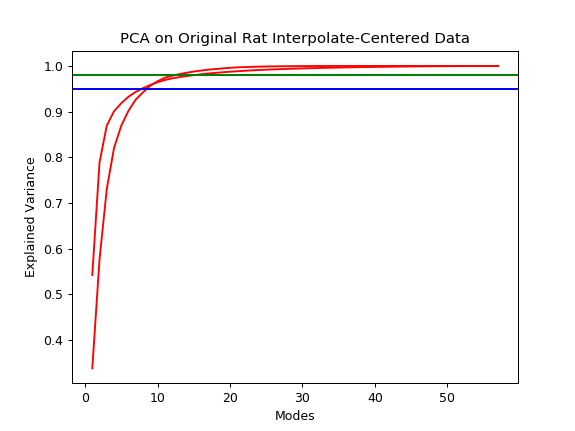

In [5]:
# data to be plotted 
x = np.arange(1, 58)
y = np.cumsum(explained_variance)
  
# plotting 
plt.title("PCA on VAE OUTPUT Data")  
plt.xlabel("Modes")  
plt.ylabel("Explained Variance")  
plt.plot(x, y, color ="red")
plt.axhline(y=0.95, color='b', linestyle='-')
plt.axhline(y=0.98, color='g', linestyle='-')
plt.show()

In [ ]:
# data to be plotted 
x = np.arange(1, 58)
y = np.cumsum(explained_variance)
  
# plotting 
plt.title("PCA on Original Rat Interpolate-Centered Data")  
plt.xlabel("Modes")  
plt.ylabel("Explained Variance")  
plt.plot(x, y, color ="red")
plt.axhline(y=0.95, color='b', linestyle='-')
plt.axhline(y=0.98, color='g', linestyle='-')
plt.show()

In [6]:
plt.savefig('PCA VAEOUTPUT Rat Data.png')

In [245]:
#Lets look at 95% range
pca = PCA(n_components=9)
VAEOUTPUT_PCA_9 = pca.fit_transform(VAEOUTPUT)
print('RatData PCA with 9 components 95% range = '+str(np.shape(VAEOUTPUT_PCA_9))+'\n')

NameError: name 'RatData_PCA_9' is not defined

In [246]:
print('RatData PCA with 9 components 95% range = '+str(np.shape(VAEOUTPUT_PCA_9))+'\n')

RatData PCA with 9 components 95% range = (19980000, 9)



In [247]:
for i in range(100):
    projs = np.array_split(np.array(VAEOUTPUT_PCA_9),100)[i]
    #print(projs.shape)
    savemat('C:\\Users\\14692\\RatDataSimulation\\VAEOUTPUT_TSNE/Projections/dataset_%i_pcaModes.mat'%(i+1), {'projections':projs})

In [2]:
import glob, os, pickle
from datetime import datetime

import numpy as np
from scipy.io import loadmat,savemat
import hdf5storage

import motionmapperpy as mmpy

In [3]:
parameters = mmpy.setRunParameters()

In [4]:
parameters.minF = 1 #% Minimum frequency for Morlet Wavelet Transform

parameters.maxF = 150                    #% Maximum frequency for Morlet Wavelet Transform,
                                        #% equal to Nyquist frequency for your measurements.

parameters.samplingFreq = 300            #% Sampling frequency (or FPS) of data.

parameters.numPeriods = 25              #% No. of frequencies between minF and maxF.

parameters.numProcessors = 16           #% No. of processor to use when parallel
                                        #% processing (for wavelets, if not using GPU). -1 to use all cores.

parameters.useGPU = -1                   # GPU to use, set to -1 if GPU not present

parameters.training_numPoints=5000      #% Number of points in mini-tSNEs.

# %%%%% NO NEED TO CHANGE THESE UNLESS RAM (NOT GPU) MEMORY ERRORS RAISED%%%%%%%%%%
parameters.trainingSetSize=50000        #% Total number of representative points to find. Increase or decrease based on
                                        #% available RAM. For reference, 36k is a good number with 64GB RAM.

parameters.embedding_batchSize = 30000  #% Lower this if you get a memory error when re-embedding points on learned
                                        #% tSNE map.

In [5]:
taskFolder = 'C:\\Users\\14692\\RatDataSimulation\\VAEOUTPUT_TSNE'

In [7]:
projectionFiles = glob.glob(taskFolder+'/Projections/*pcaModes.mat')
for i in projectionFiles:
    print(i)

m = loadmat(projectionFiles[0], variable_names=['projections'])['projections']

# %%%%%
parameters.pcaModes = m.shape[1] #%Number of PCA projections in saved files.
parameters.numProjections = parameters.pcaModes
# %%%%%
del m

print(datetime.now().strftime('%m-%d-%Y_%H-%M'))
print('tsneStarted')

if not os.path.exists(taskFolder+'/TSNE/training_tsne_embedding.mat'):
    print('Running minitSNE')
    mmpy.subsampled_tsne_from_projections(parameters, taskFolder)
    print('minitSNE done, finding embeddings now.')
    print(datetime.now().strftime('%m-%d-%Y_%H-%M'))

import h5py
with h5py.File(taskFolder+'/TSNE/training_data.mat', 'r') as hfile:
    trainingSetData = hfile['trainingSetData'][:].T
with h5py.File(taskFolder+'/TSNE/training_tsne_embedding.mat', 'r') as hfile:
    trainingEmbedding= hfile['trainingEmbedding'][:].T


for i in range(len(projectionFiles)):
    print('Finding Embeddings')
    print('%i/%i : %s'%(i+1,len(projectionFiles), projectionFiles[i]))
    if os.path.exists(projectionFiles[i][:-4] +'_zVals.mat'): #Way to skip already done code
        print('Already done. Skipping.\n')
        continue


    projections = loadmat(projectionFiles[i])['projections']
    zValues, outputStatistics = mmpy.findEmbeddings(projections,trainingSetData,trainingEmbedding,parameters)

    hdf5storage.write(data = {'zValues':zValues}, path = '/', truncate_existing = True,
                    filename = projectionFiles[i][:-4]+'_zVals.mat', store_python_metadata = False,
                      matlab_compatible = True)
    with open(projectionFiles[i][:-4] + '_zVals_outputStatistics.pkl', 'wb') as hfile:
        pickle.dump(outputStatistics, hfile)

    print('Embeddings saved.\n')
    del zValues,projections,outputStatistics

print('All Embeddings Saved!')

mmpy.findWatershedRegions(taskFolder, parameters, minimum_regions=150, startsigma=0.3, pThreshold=[0.33, 0.67],
                     saveplot=True, endident = '*_pcaModes.mat')

C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_100_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_10_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_11_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_12_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_13_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_14_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_15_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_16_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_17_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_18_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_19_pcaModes.mat
C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_1_pcaMo

Finding Embeddings
1/100 : C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_100_pcaModes.mat
Already done. Skipping.

Finding Embeddings
2/100 : C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_10_pcaModes.mat
Already done. Skipping.

Finding Embeddings
3/100 : C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_11_pcaModes.mat
Already done. Skipping.

Finding Embeddings
4/100 : C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_12_pcaModes.mat
Already done. Skipping.

Finding Embeddings
5/100 : C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_13_pcaModes.mat
Already done. Skipping.

Finding Embeddings
6/100 : C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_14_pcaModes.mat
Already done. Skipping.

Finding Embeddings
7/100 : C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_15_pcaModes.mat
Already done. Skipping.

Finding Embeddings
8/100 : C:\Users\14692\RatDa

	 Done at 9.37 seconds.
Finding Embeddings
	 Processing batch #   1 out of    7
	 Calculating distances for batch    1
	 Calculated distances for batch    1 15.71seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 52.03seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 15.50seconds.
	 Calculating fminProjections for batch    2
	 Processed batch #   2 out of    7 in 49.08seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 15.66seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 50.54seconds.

	 Processing batch #   4 out of    7
	 Calculating distances for batch    4
	 Calculated distances for batch    4 16.14seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 49.48seconds.

	 Processing batch #   5 out of    7
	 Calculatin

	 Calculated distances for batch    4 15.99seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 50.70seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 17.73seconds.
	 Calculating fminProjections for batch    5
	 Processed batch #   5 out of    7 in 53.34seconds.

	 Processing batch #   6 out of    7
	 Calculating distances for batch    6
	 Calculated distances for batch    6 17.34seconds.
	 Calculating fminProjections for batch    6
	 Processed batch #   6 out of    7 in 50.10seconds.

	 Processing batch #   7 out of    7
	 Calculating distances for batch    7
	 Calculated distances for batch    7 11.08seconds.
	 Calculating fminProjections for batch    7
	 Processed batch #   7 out of    7 in 33.84seconds.

Embeddings found in 443.15 seconds.
Embeddings saved.

Finding Embeddings
77/100 : C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_79_pcaModes.mat
F

	 Processed batch #   7 out of    7 in 33.33seconds.

Embeddings found in 441.35 seconds.
Embeddings saved.

Finding Embeddings
81/100 : C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_82_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 7.52 seconds.
Finding Embeddings
	 Processing batch #   1 out of    7
	 Calculating distances for batch    1
	 Calculated distances for batch    1 14.86seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 48.91seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 16.54seconds.
	 Calculating fminProjections for batch    2
	 Processed batch #   2 out of    7 in 50.27seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 15.59seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    

	 Processed batch #   2 out of    7 in 50.47seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 15.75seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 50.08seconds.

	 Processing batch #   4 out of    7
	 Calculating distances for batch    4
	 Calculated distances for batch    4 16.18seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 49.92seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 15.71seconds.
	 Calculating fminProjections for batch    5
	 Processed batch #   5 out of    7 in 50.79seconds.

	 Processing batch #   6 out of    7
	 Calculating distances for batch    6
	 Calculated distances for batch    6 15.96seconds.
	 Calculating fminProjections for batch    6
	 Processed batch #   6 out of    7 in 49.62seconds.

	 Processing batch #   7 out of    7
	

	 Calculated distances for batch    6 15.81seconds.
	 Calculating fminProjections for batch    6
	 Processed batch #   6 out of    7 in 49.64seconds.

	 Processing batch #   7 out of    7
	 Calculating distances for batch    7
	 Calculated distances for batch    7 10.62seconds.
	 Calculating fminProjections for batch    7
	 Processed batch #   7 out of    7 in 32.52seconds.

Embeddings found in 440.85 seconds.
Embeddings saved.

Finding Embeddings
90/100 : C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_90_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 7.53 seconds.
Finding Embeddings
	 Processing batch #   1 out of    7
	 Calculating distances for batch    1
	 Calculated distances for batch    1 14.86seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 51.90seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch  

	 Calculated distances for batch    1 15.09seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 49.95seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 15.80seconds.
	 Calculating fminProjections for batch    2
	 Processed batch #   2 out of    7 in 52.01seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 15.67seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 50.10seconds.

	 Processing batch #   4 out of    7
	 Calculating distances for batch    4
	 Calculated distances for batch    4 15.67seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 52.04seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 15.58seconds.
	 Calculating fminProjections for batch 

	 Processed batch #   4 out of    7 in 50.76seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 15.63seconds.
	 Calculating fminProjections for batch    5
	 Processed batch #   5 out of    7 in 48.68seconds.

	 Processing batch #   6 out of    7
	 Calculating distances for batch    6
	 Calculated distances for batch    6 16.51seconds.
	 Calculating fminProjections for batch    6
	 Processed batch #   6 out of    7 in 49.83seconds.

	 Processing batch #   7 out of    7
	 Calculating distances for batch    7
	 Calculated distances for batch    7 10.65seconds.
	 Calculating fminProjections for batch    7
	 Processed batch #   7 out of    7 in 31.78seconds.

Embeddings found in 440.58 seconds.
Embeddings saved.

Finding Embeddings
99/100 : C:\Users\14692\RatDataSimulation\VAEOUTPUT_TSNE/Projections\dataset_99_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #16 CPUs.
	 Done at 7.64 seconds.

69/100 Loading embedding for dataset_71_pcaModes 1.33 seconds.
70/100 Loading embedding for dataset_72_pcaModes 1.35 seconds.
71/100 Loading embedding for dataset_73_pcaModes 1.36 seconds.
72/100 Loading embedding for dataset_74_pcaModes 1.38 seconds.
73/100 Loading embedding for dataset_75_pcaModes 1.39 seconds.
74/100 Loading embedding for dataset_76_pcaModes 1.42 seconds.
75/100 Loading embedding for dataset_77_pcaModes 1.44 seconds.
76/100 Loading embedding for dataset_78_pcaModes 1.46 seconds.
77/100 Loading embedding for dataset_79_pcaModes 1.48 seconds.
78/100 Loading embedding for dataset_7_pcaModes 1.49 seconds.
79/100 Loading embedding for dataset_80_pcaModes 1.51 seconds.
80/100 Loading embedding for dataset_81_pcaModes 1.52 seconds.
81/100 Loading embedding for dataset_82_pcaModes 1.54 seconds.
82/100 Loading embedding for dataset_83_pcaModes 1.56 seconds.
83/100 Loading embedding for dataset_84_pcaModes 1.58 seconds.
84/100 Loading embedding for dataset_85_pcaModes 1.59 se

# PCA_TSNE

In [7]:
eh5 = np.load('diego_mocap_files_rat_JDM31_day_13_interpolate_centered.npy')

In [8]:
pca = PCA()
PCA_eh5 = pca.fit_transform(eh5)
explained_variance = pca.explained_variance_ratio_

In [9]:
np.cumsum(explained_variance)

array([0.54275246, 0.78905979, 0.86964905, 0.90095501, 0.91852727,
       0.93279848, 0.94329498, 0.95132311, 0.95842878, 0.96436889,
       0.96928364, 0.97276833, 0.97554665, 0.97791608, 0.9799054 ,
       0.98175729, 0.98343621, 0.98494994, 0.9861832 , 0.9873876 ,
       0.98847751, 0.98943687, 0.99035672, 0.99117401, 0.99185094,
       0.99249131, 0.99308293, 0.99361937, 0.99412594, 0.99461975,
       0.99507682, 0.99545419, 0.99582495, 0.99618143, 0.99650703,
       0.99680797, 0.99709957, 0.99737031, 0.99763091, 0.99786672,
       0.99808721, 0.99828596, 0.99848232, 0.99867379, 0.99885559,
       0.99900433, 0.99914805, 0.99928009, 0.99940857, 0.99952512,
       0.99963057, 0.99972896, 0.99980786, 0.99988445, 0.99995484,
       1.        , 1.        ])

In [10]:
# data to be plotted 
x = np.arange(1, 58)
y = np.cumsum(explained_variance)
  
# plotting 
plt.title("PCA on Original Rat Interpolate-Centered Data")  
plt.xlabel("Modes")  
plt.ylabel("Explained Variance")  
plt.plot(x, y, color ="red")
plt.axhline(y=0.95, color='b', linestyle='-')
plt.axhline(y=0.98, color='g', linestyle='-')
plt.show()

In [11]:
plt.savefig('PCA Original Intepolate Centered Data.png')

In [10]:
#Lets look at 95% range
pca = PCA(n_components=8)
RatData_PCA_9 = pca.fit_transform(eh5)
print('RatData PCA with 9 components 95% range = '+str(np.shape(RatData_PCA_9))+'\n')

RatData PCA with 9 components 95% range = (19980000, 8)



In [227]:
import glob, os, pickle
from datetime import datetime

import numpy as np
from scipy.io import loadmat,savemat
import hdf5storage

import motionmapperpy as mmpy

In [12]:
for i in range(100):
    projs = np.array_split(np.array(RatData_PCA_9),100)[i]
    #print(projs.shape)
    savemat('C:\\Users\\14692\\RatDataSimulation\\PCA_TSNE\\Projections/dataset_%i_pcaModes.mat'%(i+1), {'projections':projs})

In [228]:
parameters = mmpy.setRunParameters()

In [229]:
parameters.minF = 1 #% Minimum frequency for Morlet Wavelet Transform

parameters.maxF = 150                  #% Maximum frequency for Morlet Wavelet Transform,
                                        #% equal to Nyquist frequency for your measurements.

parameters.samplingFreq = 300            #% Sampling frequency (or FPS) of data.

parameters.numPeriods = 25              #% No. of frequencies between minF and maxF.

parameters.numProcessors = 12           #% No. of processor to use when parallel
                                        #% processing (for wavelets, if not using GPU). -1 to use all cores.

parameters.useGPU = -1                   # GPU to use, set to -1 if GPU not present

parameters.training_numPoints=5000      #% Number of points in mini-tSNEs.

# %%%%% NO NEED TO CHANGE THESE UNLESS RAM (NOT GPU) MEMORY ERRORS RAISED%%%%%%%%%%
parameters.trainingSetSize=50000        #% Total number of representative points to find. Increase or decrease based on
                                        #% available RAM. For reference, 36k is a good number with 64GB RAM.

parameters.embedding_batchSize = 30000  #% Lower this if you get a memory error when re-embedding points on learned
                                        #% tSNE map.

In [230]:
taskFolder = 'C:\\Users\\14692\\RatDataSimulation\\PCA_TSNE'

In [232]:
projectionFiles = glob.glob(taskFolder+'/Projections/*pcaModes.mat')
for i in projectionFiles:
    print(i)

m = loadmat(projectionFiles[0], variable_names=['projections'])['projections']

# %%%%%
parameters.pcaModes = m.shape[1] #%Number of PCA projections in saved files.
parameters.numProjections = parameters.pcaModes
# %%%%%
del m

print(datetime.now().strftime('%m-%d-%Y_%H-%M'))
print('tsneStarted')

if not os.path.exists(taskFolder+'/TSNE/training_tsne_embedding.mat'):
    print('Running minitSNE')
    mmpy.subsampled_tsne_from_projections(parameters, taskFolder)
    print('minitSNE done, finding embeddings now.')
    print(datetime.now().strftime('%m-%d-%Y_%H-%M'))

import h5py
with h5py.File(taskFolder+'/TSNE/training_data.mat', 'r') as hfile:
    trainingSetData = hfile['trainingSetData'][:].T
with h5py.File(taskFolder+'/TSNE/training_tsne_embedding.mat', 'r') as hfile:
    trainingEmbedding= hfile['trainingEmbedding'][:].T


for i in range(len(projectionFiles)):
    print('Finding Embeddings')
    print('%i/%i : %s'%(i+1,len(projectionFiles), projectionFiles[i]))
    if os.path.exists(projectionFiles[i][:-4] +'_zVals.mat'): #Way to skip already done code
        print('Already done. Skipping.\n')
        continue


    projections = loadmat(projectionFiles[i])['projections']
    zValues, outputStatistics = mmpy.findEmbeddings(projections,trainingSetData,trainingEmbedding,parameters)

    hdf5storage.write(data = {'zValues':zValues}, path = '/', truncate_existing = True,
                    filename = projectionFiles[i][:-4]+'_zVals.mat', store_python_metadata = False,
                      matlab_compatible = True)
    with open(projectionFiles[i][:-4] + '_zVals_outputStatistics.pkl', 'wb') as hfile:
        pickle.dump(outputStatistics, hfile)

    print('Embeddings saved.\n')
    del zValues,projections,outputStatistics

print('All Embeddings Saved!')

mmpy.findWatershedRegions(taskFolder, parameters, minimum_regions=150, startsigma=0.3, pThreshold=[0.33, 0.67],
                     saveplot=True, endident = '*_pcaModes.mat')

C:\Users\14692\RatDataSimulation\PCA_TSNE/Projections\dataset_100_pcaModes.mat
C:\Users\14692\RatDataSimulation\PCA_TSNE/Projections\dataset_10_pcaModes.mat
C:\Users\14692\RatDataSimulation\PCA_TSNE/Projections\dataset_11_pcaModes.mat
C:\Users\14692\RatDataSimulation\PCA_TSNE/Projections\dataset_12_pcaModes.mat
C:\Users\14692\RatDataSimulation\PCA_TSNE/Projections\dataset_13_pcaModes.mat
C:\Users\14692\RatDataSimulation\PCA_TSNE/Projections\dataset_14_pcaModes.mat
C:\Users\14692\RatDataSimulation\PCA_TSNE/Projections\dataset_15_pcaModes.mat
C:\Users\14692\RatDataSimulation\PCA_TSNE/Projections\dataset_16_pcaModes.mat
C:\Users\14692\RatDataSimulation\PCA_TSNE/Projections\dataset_17_pcaModes.mat
C:\Users\14692\RatDataSimulation\PCA_TSNE/Projections\dataset_18_pcaModes.mat
C:\Users\14692\RatDataSimulation\PCA_TSNE/Projections\dataset_19_pcaModes.mat
C:\Users\14692\RatDataSimulation\PCA_TSNE/Projections\dataset_1_pcaModes.mat
C:\Users\14692\RatDataSimulation\PCA_TSNE/Projections\dataset_20

	 Done at 6.87 seconds.
Finding Embeddings
	 Processing batch #   1 out of    7
	 Calculating distances for batch    1
	 Calculated distances for batch    1 15.66seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 52.51seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 17.38seconds.
	 Calculating fminProjections for batch    2
	 Processed batch #   2 out of    7 in 56.85seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 15.60seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 53.82seconds.

	 Processing batch #   4 out of    7
	 Calculating distances for batch    4
	 Calculated distances for batch    4 15.72seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 53.34seconds.

	 Processing batch #   5 out of    7
	 Calculatin

	 Calculated distances for batch    4 15.74seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 50.93seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 15.38seconds.
	 Calculating fminProjections for batch    5
	 Processed batch #   5 out of    7 in 51.57seconds.

	 Processing batch #   6 out of    7
	 Calculating distances for batch    6
	 Calculated distances for batch    6 15.63seconds.
	 Calculating fminProjections for batch    6
	 Processed batch #   6 out of    7 in 50.88seconds.

	 Processing batch #   7 out of    7
	 Calculating distances for batch    7
	 Calculated distances for batch    7 10.34seconds.
	 Calculating fminProjections for batch    7
	 Processed batch #   7 out of    7 in 36.32seconds.

Embeddings found in 444.52 seconds.
Embeddings saved.

Finding Embeddings
56/100 : C:\Users\14692\RatDataSimulation\PCA_TSNE/Projections\dataset_5_pcaModes.mat
Finding 

	 Processed batch #   7 out of    7 in 35.88seconds.

Embeddings found in 451.18 seconds.
Embeddings saved.

Finding Embeddings
60/100 : C:\Users\14692\RatDataSimulation\PCA_TSNE/Projections\dataset_63_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #12 CPUs.
	 Done at 7.31 seconds.
Finding Embeddings
	 Processing batch #   1 out of    7
	 Calculating distances for batch    1
	 Calculated distances for batch    1 16.06seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 54.37seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 16.22seconds.
	 Calculating fminProjections for batch    2
	 Processed batch #   2 out of    7 in 52.64seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 15.76seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 5

	 Processed batch #   2 out of    7 in 54.38seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 16.69seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 53.39seconds.

	 Processing batch #   4 out of    7
	 Calculating distances for batch    4
	 Calculated distances for batch    4 17.48seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 55.22seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 16.34seconds.
	 Calculating fminProjections for batch    5
	 Processed batch #   5 out of    7 in 57.41seconds.

	 Processing batch #   6 out of    7
	 Calculating distances for batch    6
	 Calculated distances for batch    6 16.18seconds.
	 Calculating fminProjections for batch    6
	 Processed batch #   6 out of    7 in 54.37seconds.

	 Processing batch #   7 out of    7
	

	 Calculated distances for batch    6 16.60seconds.
	 Calculating fminProjections for batch    6
	 Processed batch #   6 out of    7 in 54.86seconds.

	 Processing batch #   7 out of    7
	 Calculating distances for batch    7
	 Calculated distances for batch    7 10.82seconds.
	 Calculating fminProjections for batch    7
	 Processed batch #   7 out of    7 in 35.23seconds.

Embeddings found in 465.68 seconds.
Embeddings saved.

Finding Embeddings
69/100 : C:\Users\14692\RatDataSimulation\PCA_TSNE/Projections\dataset_71_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #12 CPUs.
	 Done at 7.26 seconds.
Finding Embeddings
	 Processing batch #   1 out of    7
	 Calculating distances for batch    1
	 Calculated distances for batch    1 15.59seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 55.89seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 15

	 Calculated distances for batch    1 14.99seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 52.37seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 16.20seconds.
	 Calculating fminProjections for batch    2
	 Processed batch #   2 out of    7 in 51.82seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 15.86seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 55.62seconds.

	 Processing batch #   4 out of    7
	 Calculating distances for batch    4
	 Calculated distances for batch    4 15.65seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 51.41seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 16.30seconds.
	 Calculating fminProjections for batch 

	 Processed batch #   4 out of    7 in 51.49seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 16.15seconds.
	 Calculating fminProjections for batch    5
	 Processed batch #   5 out of    7 in 53.54seconds.

	 Processing batch #   6 out of    7
	 Calculating distances for batch    6
	 Calculated distances for batch    6 16.45seconds.
	 Calculating fminProjections for batch    6
	 Processed batch #   6 out of    7 in 52.00seconds.

	 Processing batch #   7 out of    7
	 Calculating distances for batch    7
	 Calculated distances for batch    7 11.14seconds.
	 Calculating fminProjections for batch    7
	 Processed batch #   7 out of    7 in 36.51seconds.

Embeddings found in 460.68 seconds.
Embeddings saved.

Finding Embeddings
78/100 : C:\Users\14692\RatDataSimulation\PCA_TSNE/Projections\dataset_7_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #12 CPUs.
	 Done at 6.87 seconds.
Findin

Embeddings found in 473.79 seconds.
Embeddings saved.

Finding Embeddings
82/100 : C:\Users\14692\RatDataSimulation\PCA_TSNE/Projections\dataset_83_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #12 CPUs.
	 Done at 7.01 seconds.
Finding Embeddings
	 Processing batch #   1 out of    7
	 Calculating distances for batch    1
	 Calculated distances for batch    1 15.29seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 54.80seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 16.47seconds.
	 Calculating fminProjections for batch    2
	 Processed batch #   2 out of    7 in 54.58seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 16.19seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 52.51seconds.

	 Processing batch #   4 out of    7
	 C

	 Calculated distances for batch    3 15.67seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 55.97seconds.

	 Processing batch #   4 out of    7
	 Calculating distances for batch    4
	 Calculated distances for batch    4 15.50seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 54.57seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 16.38seconds.
	 Calculating fminProjections for batch    5
	 Processed batch #   5 out of    7 in 54.97seconds.

	 Processing batch #   6 out of    7
	 Calculating distances for batch    6
	 Calculated distances for batch    6 15.64seconds.
	 Calculating fminProjections for batch    6
	 Processed batch #   6 out of    7 in 54.12seconds.

	 Processing batch #   7 out of    7
	 Calculating distances for batch    7
	 Calculated distances for batch    7 10.83seconds.
	 Calculating fminProjections for batch 

	 Processed batch #   6 out of    7 in 52.34seconds.

	 Processing batch #   7 out of    7
	 Calculating distances for batch    7
	 Calculated distances for batch    7 10.63seconds.
	 Calculating fminProjections for batch    7
	 Processed batch #   7 out of    7 in 35.87seconds.

Embeddings found in 461.30 seconds.
Embeddings saved.

Finding Embeddings
91/100 : C:\Users\14692\RatDataSimulation\PCA_TSNE/Projections\dataset_91_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #12 CPUs.
	 Done at 6.77 seconds.
Finding Embeddings
	 Processing batch #   1 out of    7
	 Calculating distances for batch    1
	 Calculated distances for batch    1 15.03seconds.
	 Calculating fminProjections for batch    1
	 Processed batch #   1 out of    7 in 52.22seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 15.51seconds.
	 Calculating fminProjections for batch    2
	 Processed batch #   2 out of    7 in 5

	 Processed batch #   1 out of    7 in 52.03seconds.

	 Processing batch #   2 out of    7
	 Calculating distances for batch    2
	 Calculated distances for batch    2 15.87seconds.
	 Calculating fminProjections for batch    2
	 Processed batch #   2 out of    7 in 49.91seconds.

	 Processing batch #   3 out of    7
	 Calculating distances for batch    3
	 Calculated distances for batch    3 15.62seconds.
	 Calculating fminProjections for batch    3
	 Processed batch #   3 out of    7 in 51.64seconds.

	 Processing batch #   4 out of    7
	 Calculating distances for batch    4
	 Calculated distances for batch    4 15.68seconds.
	 Calculating fminProjections for batch    4
	 Processed batch #   4 out of    7 in 52.05seconds.

	 Processing batch #   5 out of    7
	 Calculating distances for batch    5
	 Calculated distances for batch    5 15.65seconds.
	 Calculating fminProjections for batch    5
	 Processed batch #   5 out of    7 in 52.13seconds.

	 Processing batch #   6 out of    7
	

	 Calculated distances for batch    5 16.28seconds.
	 Calculating fminProjections for batch    5
	 Processed batch #   5 out of    7 in 50.54seconds.

	 Processing batch #   6 out of    7
	 Calculating distances for batch    6
	 Calculated distances for batch    6 15.67seconds.
	 Calculating fminProjections for batch    6
	 Processed batch #   6 out of    7 in 52.49seconds.

	 Processing batch #   7 out of    7
	 Calculating distances for batch    7
	 Calculated distances for batch    7 10.79seconds.
	 Calculating fminProjections for batch    7
	 Processed batch #   7 out of    7 in 33.67seconds.

Embeddings found in 447.71 seconds.
Embeddings saved.

Finding Embeddings
100/100 : C:\Users\14692\RatDataSimulation\PCA_TSNE/Projections\dataset_9_pcaModes.mat
Finding Wavelets
	 Calculating wavelets, clock starting.
	 Using #12 CPUs.
	 Done at 6.41 seconds.
Finding Embeddings
	 Processing batch #   1 out of    7
	 Calculating distances for batch    1
	 Calculated distances for batch    1 14

91/100 Loading embedding for dataset_91_pcaModes 1.96 seconds.
92/100 Loading embedding for dataset_92_pcaModes 1.99 seconds.
93/100 Loading embedding for dataset_93_pcaModes 2.01 seconds.
94/100 Loading embedding for dataset_94_pcaModes 2.02 seconds.
95/100 Loading embedding for dataset_95_pcaModes 2.04 seconds.
96/100 Loading embedding for dataset_96_pcaModes 2.06 seconds.
97/100 Loading embedding for dataset_97_pcaModes 2.08 seconds.
98/100 Loading embedding for dataset_98_pcaModes 2.10 seconds.
99/100 Loading embedding for dataset_99_pcaModes 2.12 seconds.
100/100 Loading embedding for dataset_9_pcaModes 2.14 seconds.
Starting watershed transform...
	 Sigma 0.35, Regions 1173
	 Sigma 0.40, Regions 894
	 Sigma 0.45, Regions 696
	 Sigma 0.50, Regions 560
	 Sigma 0.55, Regions 456
	 Sigma 0.60, Regions 387
	 Sigma 0.65, Regions 333
	 Sigma 0.70, Regions 291
	 Sigma 0.75, Regions 252
	 Sigma 0.80, Regions 221
	 Sigma 0.85, Regions 199
	 Sigma 0.90, Regions 184
	 Sigma 0.95, Regions 164

# Making Movies for Watershed Regions

In [52]:
mat['groups'][2][0]

array([[     6, 110254, 110400],
       [     6, 110561, 110710],
       [     6, 110998, 111068],
       ...,
       [   100, 144860, 144970],
       [   100, 144999, 145078],
       [   100, 145211, 145291]], dtype=int64)

In [58]:
mat['groups'][3][0][:,1:]

array([[ 78673,  78741],
       [102706, 102778],
       [103407, 103744],
       ...,
       [186253, 186363],
       [196013, 196076],
       [ 57725,  57809]], dtype=int64)

In [53]:
nframes = np.atleast_1d(np.diff(mat['groups'][2][0][:, 1:], axis=1).squeeze())

In [54]:
nframes

array([146, 149,  70, 111,  62, 248,  70, 251, 232,  66, 117,  89,  65,
        94, 103, 153, 136, 127, 152,  84, 304, 206,  77, 224, 265, 142,
        74,  69, 209, 101, 103,  60, 324,  87,  70,  69, 116, 193, 102,
       138, 101, 147,  71,  81,  62, 177,  97, 117,  84, 112,  73,  93,
        79, 165, 152,  74,  65, 193,  75, 101,  96, 157,  91, 306, 158,
       136,  93, 150,  94, 133, 151,  76,  65,  79, 121, 143,  92, 140,
       101,  72,  98,  91,  76,  82,  62, 102, 236,  60, 150,  64,  85,
       104,  77, 114, 122, 297, 119, 113, 186, 316,  67,  73,  67, 112,
        92, 113, 208,  64, 264, 188,  65, 127, 189,  80, 451,  88, 174,
       265,  80, 121, 253, 197, 166,  98, 167, 205,  63, 425,  85,  78,
       158, 121, 218, 234, 151, 190,  83, 157,  99, 129,  96, 100, 166,
       123, 105,  84, 134,  72,  89,  98, 320, 118, 112, 233,  83, 110,
       114,  78,  72,  61, 145, 106,  99,  62,  67,  87, 114,  66,  79,
       120, 117, 135, 108, 100, 121,  60, 212, 102, 207,  60, 14

In [42]:
len(nframes[nframes > 120]

1871

In [42]:
regions = 2

In [280]:
subs=6
nframes = np.atleast_1d(np.diff(mat['groups'][78][0][:, 1:], axis=1).squeeze())
nplots = min(subs * subs, np.sum((nframes < 1000) & (nframes > 150)))
longinds = np.where((nframes < 1000) & (nframes > 150))[0]

selectedclips = longinds[np.argsort(nframes[longinds])[::-1]][:nplots]
vidindslist = mat['groups'][78][0][selectedclips, 0]

In [236]:
framestoplot = np.array([np.arange(mat['groups'][78][0][i, 1], mat['groups'][78][0][i, 2]) for i in selectedclips])

In [281]:
selectedclips

array([0], dtype=int64)

In [282]:
vidindslist

array([34], dtype=int64)

In [285]:
longinds.shape[0]

1

In [239]:
framestoplot

array([[54466, 54467, 54468, 54469, 54470, 54471, 54472, 54473, 54474,
        54475, 54476, 54477, 54478, 54479, 54480, 54481, 54482, 54483,
        54484, 54485, 54486, 54487, 54488, 54489, 54490, 54491, 54492,
        54493, 54494, 54495, 54496, 54497, 54498, 54499, 54500, 54501,
        54502, 54503, 54504, 54505, 54506, 54507, 54508, 54509, 54510,
        54511, 54512, 54513, 54514, 54515, 54516, 54517, 54518, 54519,
        54520, 54521, 54522, 54523, 54524, 54525, 54526, 54527, 54528]],
      dtype=int64)

In [2]:
data = np.load('diego_mocap_files_rat_JDM31_day_13_interpolate_centered.npy')
egoh5s = data.reshape(100, 199800, 19,3)

In [223]:
VAEOUTPUT = np.load('VAEOUTPUT.npy')

In [224]:
egoh5s = VAEOUTPUT.reshape(100, 199800, 19,3)

In [179]:
egoh5s.shape

(100, 199800, 19, 3)

In [3]:
OutputFolder = 'C:\\Users\\14692\\RatDataSimulation\\VAESAMPLING_TSNE\\TSNE'

In [4]:
import hdf5storage
mat = hdf5storage.loadmat('C:\\Users\\14692\\RatDataSimulation\\VAESAMPLING_TSNE\\TSNE\\zVals_wShed_groups.mat')

In [213]:
def Kinematics_makeregionvideos(region, outputdir, groups, animfps=60.0, subs=6, pad=200):
    if os.path.exists(outputdir + 'regions_' + '%.3i' % (region + 1) + '.mp4'):
        return
    matplotlib.use('Agg')
    try:
        tqdm._instances.clear()
    except:
        pass
    connections2 = [[5, 4, 6], [4, 17, 18], [11, 12], [0, 2, 15, 17, 16, 3, 1], [13, 9, 7, 18, 8, 10, 14]]
    if not groups[region][0].shape[0]: #or groups[region][0].shape[0] == 1
        print('No videos for region %i' % (region + 1))
        return
    print('Starting region %i' % (region + 1))
    try:
        nframes = np.atleast_1d(np.diff(groups[region][0][:, 1:], axis=1).squeeze())
        nplots = min(subs * subs, np.sum((nframes < 1000) & (nframes > 150)))
        longinds = np.where((nframes < 1000) & (nframes > 150))[0]
        if not longinds.shape[0]:
            print('No videos for region %i' % (region + 1))
            return
        selectedclips = longinds[np.argsort(nframes[longinds])[::-1]][:nplots]
        vidindslist = groups[region][0][selectedclips, 0]
        framestoplot = np.array([np.arange(groups[region][0][i, 1], groups[region][0][i, 2]) for i in selectedclips])
        maxsize = max([i.shape[0] for i in framestoplot])
        dnames = [str(v) for v in vidindslist]
        framestoplot = framestoplot[np.argsort(dnames)]
        vidindslist = vidindslist[np.argsort(dnames)]
        dnames = [dnames[i] for i in np.argsort(dnames)]
        subx = max(2, int(np.ceil(np.sqrt(nplots))))
        # framestoplot = np.array([np.resize(i, maxsize) for i in framestoplot])
        from mpl_toolkits.mplot3d import Axes3D
        fig, axes = plt.subplots(subx, subx, figsize=(12, 12), subplot_kw={'projection': '3d'})
        fig.subplots_adjust(0.05, 0, 1.0, 1.0, 0.0, 0.0)
        def make_frame(t):
            j_ = int(t * animfps)
            for i in range(subx * subx):
                ax = axes[i // subx, i % subx]
                ax.clear()
                ax.axis('off')
                if i >= nplots:
                    continue
                j = j_ % len(framestoplot[i])
                for conn in connections2:
                    ax.plot(egoh5s[vidindslist[i]-1][framestoplot[i][j], conn, 0], #
                            egoh5s[vidindslist[i]-1][framestoplot[i][j], conn, 1], #
                            egoh5s[vidindslist[i]-1][framestoplot[i][j], conn, 2], #
                            'o-', alpha=0.7)
                ax.set_xlim([-150, 150])
                ax.set_ylim([-150, 150])
                ax.set_zlim([-50, 150])
                ax.view_init(10, 75)
                ax.text(0, 0, 100, str(vidindslist[i]), fontsize=15)
            return mplfig_to_npimage(fig)
        try:
            tqdm._instances.clear()
        except:
            pass
        animation = VideoClip(make_frame, duration=maxsize / animfps)
        animation.write_videofile(outputdir + 'regions_' + '%.3i' % (region + 1) + '.mp4', fps=animfps, audio=False,
                                  threads=1)
        print('Video saved at ', outputdir + 'regions_' + '%.3i' % (region + 1) + '.mp4')
    except Exception as E:
        raise (E)
        print('Exception caught for region %i' % (region + 1))
        print(str(E))


In [65]:
mat['groups'][region][0]

array([[     6, 110254, 110400],
       [     6, 110561, 110710],
       [     6, 110998, 111068],
       ...,
       [   100, 144860, 144970],
       [   100, 144999, 145078],
       [   100, 145211, 145291]], dtype=int64)

In [91]:
nframes_selectedclips = mat['groups'][region][0][selectedclips,][2] - mat['groups'][region][0][selectedclips,][2]

In [93]:
nframes[selectedclips]

array([346, 340, 331, 330, 324, 320, 316, 312, 309, 306, 304, 297, 297,
       289, 287, 286, 282, 280, 279, 276, 275, 273, 271, 271, 268, 267,
       267, 266, 265, 265, 264, 264, 263, 260, 258, 258], dtype=int64)

In [ ]:
#5 430 431

In [217]:
subs=10
region = 38
nframes = np.atleast_1d(np.diff(mat['groups'][region][0][:, 1:], axis=1).squeeze())
nplots = min(subs * subs, np.sum((nframes < 1000) & (nframes > 100)))
longinds = np.where((nframes < 1000) & (nframes > 100))[0]

selectedclips = longinds[np.argsort(nframes[longinds])[::-1]][:nplots]
vidindslist = mat['groups'][region][0][selectedclips, 0]
print(nframes)

print(np.c_[mat['groups'][region][0][selectedclips,],nframes[selectedclips]])

[ 77  70 127  91  64  94 158 123 144  77  88  75 107  65  87 130 143  95
 128  60  89 214 161 106  84  79  92  85  84  83  98  75  73  69 175  74
  94 210  79  82 227  77  92 185  77 123 143 124  69  64 137  82  96  63
 194  89  71  78 154  81 150  80  70  76 145  87  63 171 104  83  62  98
 103  71  62  97 199  72 114 130  99  87  60  80  87 118  68  60 137  62
  62 125  98  95 144  61  79 125  74  70 137  61  86 116  79 114  79  71
  95 106 123 170 188  66  80 133 259  64  61  89 205  90 140 190  72  69
  95 104  94  72  83 138  83 205 125  85 153 113  79  99 121  70 111  61
  69 292 144 128 205  62  63 257  74 108 194  73  95 144  99 203  81  67
  64 114 132 114  95  84  65  90 171  84 131  60  90 143  72  85  92  88
 190  64 104  82  78 131  87 168  94  63  77  77  74 114 103  76 140  74
  71  71  66 104  87 172  95  89 120 131  94 121 162  77  98  72 115 180
  63  71  75 185 110  70  79  99 114  70 157 184  74  97  64  64  72 116
 135  78  73  71 101  85 114  67 102 126  93 124 17

In [225]:
Kinematics_makeregionvideos(region = 123, outputdir = OutputFolder, groups = mat['groups'], animfps=60.0, subs=2, pad=200)

t:   0%|                                                                             | 0/156 [00:00<?, ?it/s, now=None]

Starting region 124
Moviepy - Building video C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE\TSNEregions_124.mp4.
Moviepy - Writing video C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE\TSNEregions_124.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE\TSNEregions_124.mp4
Video saved at  C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE\TSNEregions_124.mp4


In [98]:
mat['watershedRegions'][0]

array([ 0,  0,  0, ...,  0, 60, 60])

In [101]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [134]:
b = np.where(mat['watershedRegions'][0] == 113)

In [126]:
b[0][:100]

array([ 17175,  17176,  17177,  17231,  21495,  21496,  33128,  43292,
        43293,  43294,  47399,  48083,  48084,  48135,  48529,  48530,
        48621,  76107,  76108,  76109,  76110,  76212,  82768,  82769,
        84374,  85555,  98523,  98524, 103418, 109179, 113191, 115906,
       115907, 117757, 117758, 117759, 128874, 130225, 130226, 131339,
       132716, 132725, 133150, 133151, 133176, 133177, 133178, 133795,
       133847, 135271, 135307, 135386, 135454, 135455, 135456, 135457,
       138282, 138283, 139223, 139327, 145408, 145409, 147327, 147328,
       147329, 147330, 147877, 147878, 147918, 148755, 148849, 148850,
       148851, 148852, 148911, 149264, 149265, 149920, 150363, 150364,
       151040, 151041, 151698, 151706, 151843, 152219, 152478, 152528,
       152529, 152530, 152531, 152753, 152754, 152755, 152987, 152988,
       152989, 152990, 152991, 153057], dtype=int64)

In [135]:
data[b[0]].shape

(166919, 57)

<IPython.core.display.Javascript object>


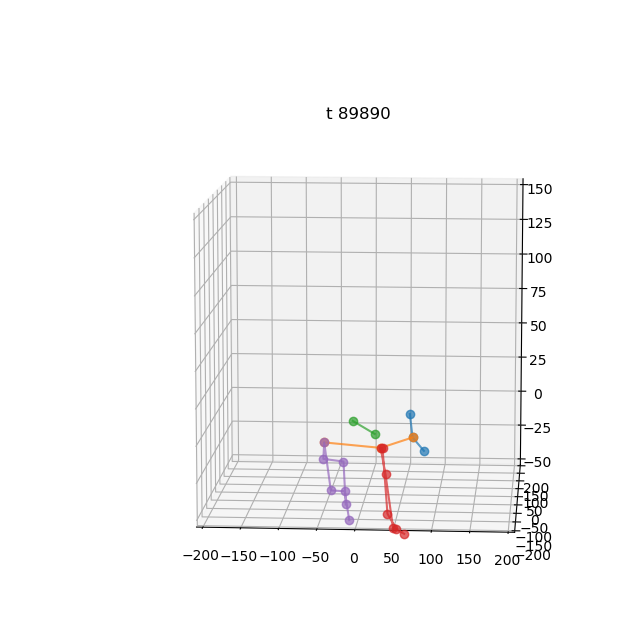

KeyboardInterrupt: 

In [136]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

connections = [[5, 4, 6], [4,17,18], [11,12], [0,2,15,17,16,3,1], [13,9,7,18,8,10,14]]


ts = data[b[0]].reshape((-1,19,3)) 

skipevery = 1


fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111, projection='3d')
# fig.show()
fig.canvas.draw()
count = 0
for t in range(1,data[b[0]].shape[0], 57):
    ax1.clear()
    for conn in connections:
        ax1.plot(ts[t*skipevery,conn,0],ts[t*skipevery,conn,1], ts[t*skipevery,conn,2], 'o-', alpha=0.7)
    ax1.set_xlim([-200, 200])
    ax1.set_ylim([-200, 200])
    ax1.set_zlim([-50, 150])
    ax1.view_init(10, count/0.5)
    count += 1
    ax1.set_title('t %i'%(t*1)) 
    #plt.savefig("/home/shin/Prediction_Interpolated_vs_Interpolated/Graph" + str(t) +".png", format="PNG")
    
    
    fig.canvas.draw()   

In [51]:
Kinematics_makeregionvideos(region = 0, outputdir = OutputFolder, groups = mat['groups'], animfps=60.0, subs=6, pad=200)

t:   0%|                                                                              | 0/69 [00:00<?, ?it/s, now=None]

Starting region 1
Moviepy - Building video C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE\TSNEregions_001.mp4.
Moviepy - Writing video C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE\TSNEregions_001.mp4




t:   8%|█████▊                                                              | 63/743 [08:29<07:20,  1.54it/s, now=None]

Moviepy - Done !
Moviepy - video ready C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE\TSNEregions_001.mp4
Video saved at  C:\Users\14692\RatDataSimulation\VAESAMPLING_TSNE\TSNEregions_001.mp4


# Plotting Latent Space

In [5]:
eh5 = np.load('diego_mocap_files_rat_JDM31_day_13_interpolate_centered.npy')
#variational_encoder = Model(inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])
variational_encoder = tf.keras.models.load_model('encoder/variational_encoder_four_layer_11')
VAESAMPLING = variational_encoder.predict(eh5)
VAESAMPLING[2].shape

KeyboardInterrupt: 

In [86]:
VAESAMPLING_encoder = VAESAMPLING[2]
save('VAESAMPLING_encoder.npy', VAESAMPLING_encoder)

In [9]:
VAESAMPLING_encoder = np.load('VAESAMPLING_encoder.npy')

In [10]:
VAESAMPLING_encoder_100 = VAESAMPLING_encoder.reshape(100, 199800, 10)

In [8]:
VAESAMPLING_encoder_100.shape

(100, 199800, 10)

In [110]:
VAESAMPLING_encoder_100

array([[[-1.8391739 , -4.385581  , -3.674038  , ..., -0.20605817,
          0.4971559 , -8.442531  ],
        [-1.8410549 , -4.3794637 , -3.680286  , ..., -0.09538881,
          0.5219748 , -8.402061  ],
        [-1.834109  , -4.4009523 , -3.6752496 , ..., -0.08452625,
          0.4300522 , -8.510406  ],
        ...,
        [-1.7620643 , -1.501211  , -1.3952438 , ..., -1.4674399 ,
         -0.2681592 , -1.0063441 ],
        [-1.7713826 , -1.476843  , -1.3749075 , ..., -1.5389403 ,
         -0.3295052 , -0.95431757],
        [-1.7606766 , -1.515421  , -1.400148  , ..., -1.4816759 ,
         -0.31828037, -0.92587864]],

       [[-1.7741803 , -1.478026  , -1.3777621 , ..., -1.384015  ,
         -0.29865792, -0.9690227 ],
        [-1.7762599 , -1.5308409 , -1.4473585 , ..., -1.4199613 ,
         -0.3252415 , -0.95647264],
        [-1.7588367 , -1.4834611 , -1.4056166 , ..., -1.4895754 ,
         -0.37368456, -0.9151843 ],
        ...,
        [ 0.69654036,  0.03100106,  1.2900094 , ..., -

In [ ]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

In [106]:
np.arange(2000).shape

(2000,)

In [108]:
VAESAMPLING_encoder_100[0][0:10][0].shape

(10,)

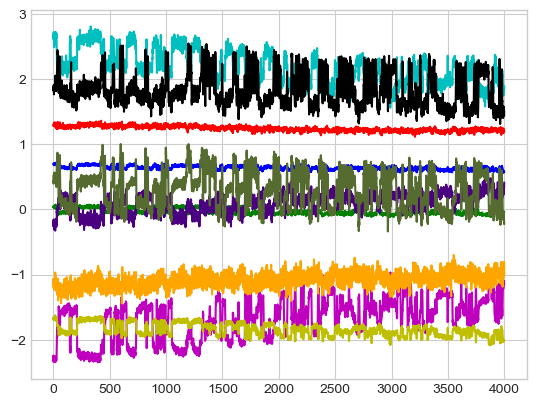

In [174]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()

length = 4000;
start = 0;
end = 4000;

groupnumber = 2;

plt.plot(np.arange(length), VAESAMPLING_encoder_100[groupnumber,start:end,0], color='blue')        # specify color by name
plt.plot(np.arange(length), VAESAMPLING_encoder_100[groupnumber,start:end,1], color='g')           # short color code (rgbcmyk)
plt.plot(np.arange(length), VAESAMPLING_encoder_100[groupnumber,start:end,2], color='r')        # Grayscale between 0 and 1
plt.plot(np.arange(length), VAESAMPLING_encoder_100[groupnumber,start:end,3], color='c')     # Hex code (RRGGBB from 00 to FF)
plt.plot(np.arange(length), VAESAMPLING_encoder_100[groupnumber,start:end,4], color= 'm') # RGB tuple, values 0 to 1
plt.plot(np.arange(length), VAESAMPLING_encoder_100[groupnumber,start:end,5], color= 'y')
plt.plot(np.arange(length), VAESAMPLING_encoder_100[groupnumber,start:end,6], color='k')
plt.plot(np.arange(length), VAESAMPLING_encoder_100[groupnumber,start:end,7], color='orange')
plt.plot(np.arange(length), VAESAMPLING_encoder_100[groupnumber,start:end,8], color='indigo')
plt.plot(np.arange(length), VAESAMPLING_encoder_100[groupnumber,start:end,9], color='darkolivegreen')

fig

In [ ]:
plt.savefig('Latent_Space_Example.png')